# Setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

if not cv.useOptimized():
    cv.setUseOptimized(True)
cv.useOptimized()


True

# Exercise 1

1. Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.


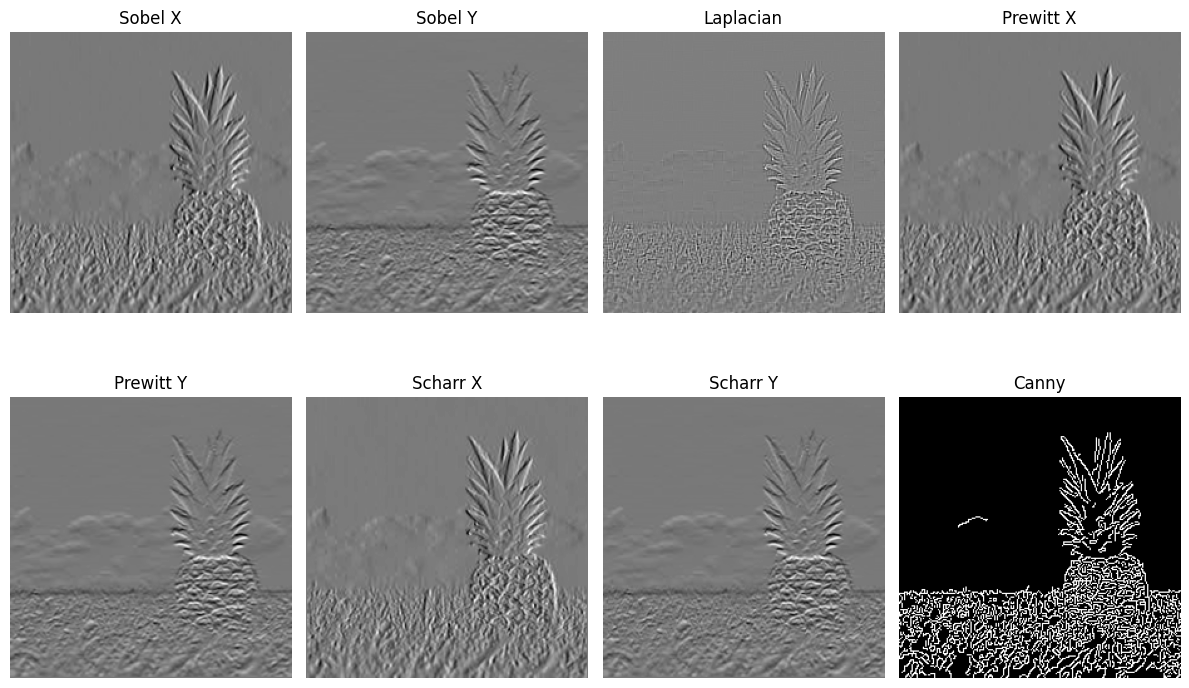

In [23]:
# Load the image
image_path = 'images/pineapple.jfif'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Apply different edge detectors
sobel_x = cv.Sobel(image, cv.CV_32F, 1, 0, ksize=3)
sobel_y = cv.Sobel(image, cv.CV_32F, 0, 1, ksize=3)
laplacian = cv.Laplacian(image, cv.CV_32F, ksize=3)
prewitt_x = cv.Sobel(image, cv.CV_32F, 1, 0, ksize=3)
prewitt_y = cv.Sobel(image, cv.CV_32F, 0, 1, ksize=3)
scharr_x = cv.Scharr(image, cv.CV_32F, 1, 0)
scharr_y = cv.Scharr(image, cv.CV_32F, 0, 1)
canny = cv.Canny(image, 100, 200)

# Display the results using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.axis('off')
plt.subplot(2, 4, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.axis('off')
plt.subplot(2, 4, 3), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian')
plt.axis('off')
plt.subplot(2, 4, 4), plt.imshow(prewitt_x, cmap='gray'), plt.title('Prewitt X')
plt.axis('off')
plt.subplot(2, 4, 5), plt.imshow(prewitt_y, cmap='gray'), plt.title('Prewitt Y')
plt.axis('off')
plt.subplot(2, 4, 6), plt.imshow(scharr_x, cmap='gray'), plt.title('Scharr X')
plt.axis('off')
plt.subplot(2, 4, 7), plt.imshow(scharr_y, cmap='gray'), plt.title('Scharr Y')
plt.axis('off')
plt.subplot(2, 4, 8), plt.imshow(canny, cmap='gray'), plt.title('Canny')
plt.axis('off')


plt.tight_layout()
plt.show()

1. Sobel Edge Detector:
- Sobel is a gradient-based edge detection operator.
- It detects edges by emphasizing regions of rapid intensity change.
- Typically provides reasonable edge detection results with low noise sensitivity.
- Comments: Sobel edges may be well-defined, capturing both vertical and horizontal edges.


2: Laplacian Edge Detector:

- Laplacian is a second-order derivative operator.
- It highlights regions where the second derivative of intensity changes, revealing areas of rapid intensity variation.
- More sensitive to noise, which can result in thinner edges.
- Comments: Laplacian edges might be more pronounced and can capture finer details, but noise can also be more apparent.


3. Prewitt Edge Detector:

- Prewitt is another gradient-based edge detection operator.
- Similar to Sobel, it emphasizes areas with rapid intensity change.
- Captures edges in both horizontal and vertical directions.
- Comments: Prewitt edges could show a combination of vertical and horizontal edges, enhancing overall edge detection.

4. Scharr Edge Detector:

- Scharr is an enhancement of the Sobel operator, providing better sensitivity to diagonal edges.
- It can be useful for detecting diagonal lines and edges.
- Comments: Scharr might capture diagonal edges more effectively compared to other operators.

5. Canny Edge Detector:

- Canny is a multi-step edge detection algorithm that includes smoothing, gradient calculation, non-maximum suppression, and hysteresis thresholding.
- It produces thin edges with reduced noise.
- Often considered the gold standard for edge detection due to its accuracy and robustness.
- Comments: Canny's edges could be well-defined, with reduced noise and thin edges that accurately represent object boundaries.

# Exercise 2

2. Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.


In [42]:
import cv2 as cv
import numpy as np

# Load the image
image_path = 'images/electronic.jfif'
image = cv.imread(image_path)
original_image = image.copy()

# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply thresholding to identify white regions
ret, thresh = cv.threshold(gray_image, 200, 255, cv.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw accurate bounding boxes around identified white objects
for contour in contours:
    area = cv.contourArea(contour)
    if area > 100:  # Filter out small contours
        x, y, w, h = cv.boundingRect(contour)
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green bounding box

# Display the original image with accurate bounding boxes
cv.imshow('Objects with Accurate Bounding Boxes', image)
cv.waitKey(0)
cv.destroyAllWindows()

# Exercise 3

3. Isolate the clock with the aid of edge detection and contours' properties. The example result should be as follows: 

In [41]:
import cv2 as cv
import numpy as np

# Load the image
image_path = 'images/clock.jpg'
image = cv.imread(image_path)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv.Canny(gray, 100, 200)  # Adjust threshold values as needed

# Find contours
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Filter and analyze contours
clock_contour = None
for contour in contours:
    area = cv.contourArea(contour)
    if area > 1000 and area < 10000:  # Adjust area range as needed
        x, y, w, h = cv.boundingRect(contour)
        aspect_ratio = w / h

        if aspect_ratio > 0.8 and aspect_ratio < 1.2:  # Adjust aspect ratio range as needed
            clock_contour = contour
            break

# Calculate the minimum enclosing circle
(center, radius) = cv.minEnclosingCircle(clock_contour)
center = (int(center[0]), int(center[1]))
radius = int(radius)

# Draw the bounding circle around the clock
cv.circle(image, center, radius, (0, 255, 0), 2)

# Display the image with bounding circle
cv.imshow('Clock with Tightly Bound Circle', image)
cv.waitKey(0)
cv.destroyAllWindows()